In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.font_manager import FontProperties 
import missingno
import numpy
import seaborn as sns

In [2]:
C1_to_C2 = pd.read_excel('CalcI-CalcII-Data.xlsx')
AllCalc = pd.read_excel('AllCalcData.xlsx')

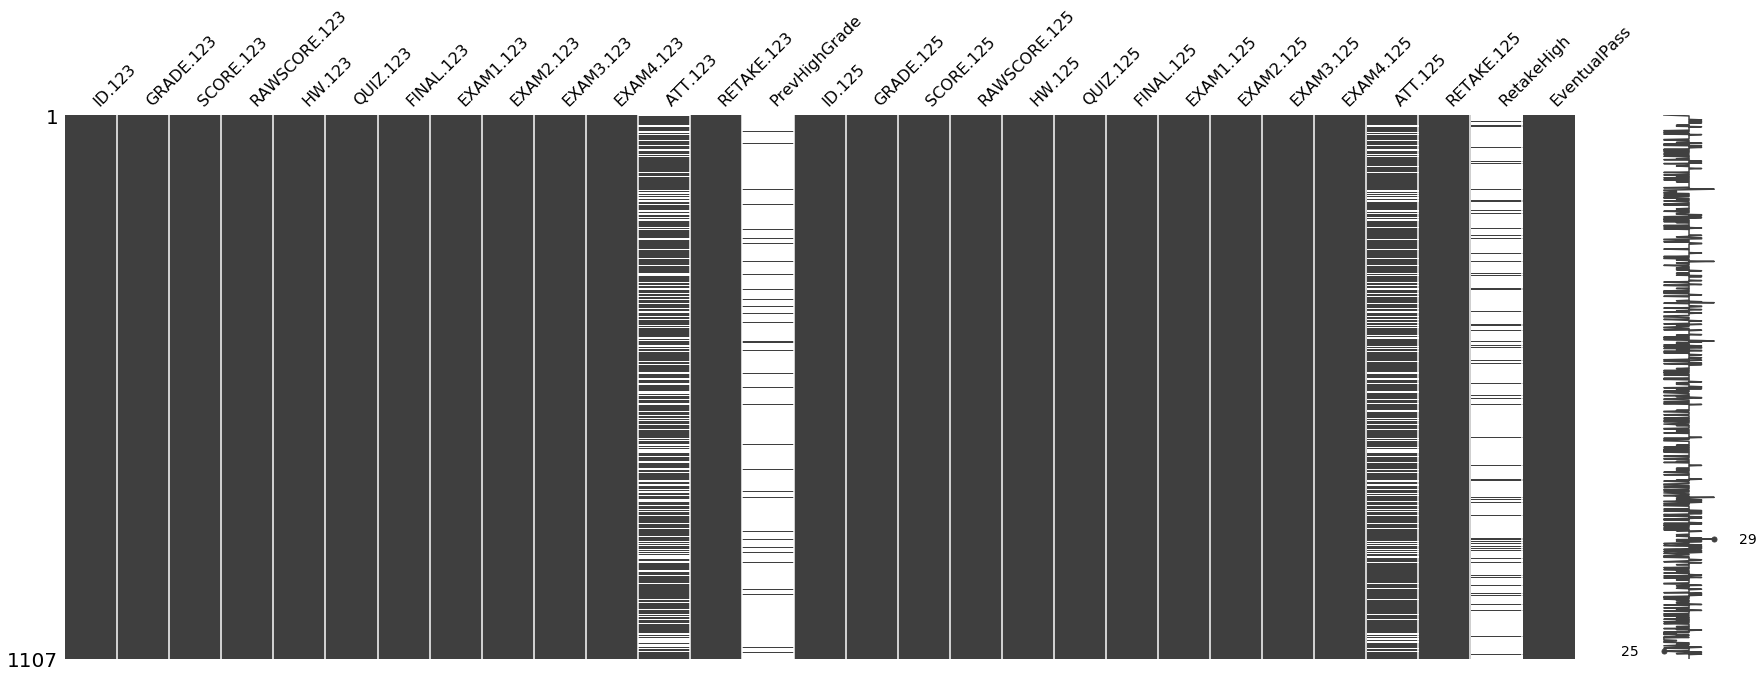

In [3]:
missingno.matrix(C1_to_C2, figsize = (30,10))
plt.show()

Students with a D grade in Math 123 have poor outcomes (D or F) in Math 125

- Boxplot to show the count of the grades for students with a D in 123


In [4]:
math123_D = C1_to_C2[C1_to_C2['GRADE.123'] == 'D']

In [5]:
math123_D.iloc[:,20:25]

,FINAL.125,EXAM1.125,EXAM2.125,EXAM3.125,EXAM4.125
15,78.75,59.03,79.86,88.00,86.49
65,0.00,26.47,39.29,15.94,0.00
118,0.00,22.22,0.00,0.00,0.00
164,56.67,71.92,84.00,54.11,88.03
174,73.75,74.66,53.52,76.71,85.82
191,13.33,6.94,26.92,15.54,6.84
208,49.10,58.57,50.00,51.61,66.12
229,53.33,69.44,66.89,55.33,52.90
250,0.00,83.82,81.43,42.75,8.33
286,69.58,61.03,87.14,52.90,63.89


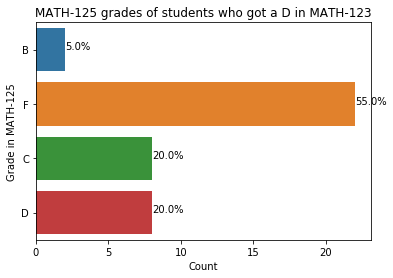

In [6]:
ax = sns.countplot(y = 'GRADE.125', data = math123_D)
plt.ylabel('Grade in MATH-125')
plt.xlabel('Count')
plt.title('MATH-125 grades of students who got a D in MATH-123')

total = len(math123_D['GRADE.125'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.show()

In [7]:
# Exam 1 Mean and Median
mean_E1_D = numpy.mean(math123_D['EXAM1.125'])
median_E1_D = numpy.median(math123_D['EXAM1.125'])
print('EXAM 1 MEAN:', mean_E1_D)
print('EXAM 1 MEDIAN:', median_E1_D,'\n')
#Exam 2 Mean and Median
mean_E2_D = numpy.mean(math123_D['EXAM2.125'])
median_E2_D = numpy.median(math123_D['EXAM2.125'])
print('EXAM 2 MEAN:', mean_E2_D)
print('EXAM 2 MEDIAN:', median_E2_D,'\n')
# Exam 3 Mean and Median
mean_E3_D = numpy.mean(math123_D['EXAM3.125'])
median_E3_D = numpy.median(math123_D['EXAM3.125'])
print('EXAM 3 MEAN:', mean_E3_D)
print('EXAM 3 MEDIAN:', median_E3_D,'\n')
# Exam 4 Mean and Median
mean_E4_D = numpy.mean(math123_D['EXAM4.125'])
median_E4_D = numpy.median(math123_D['EXAM4.125'])
print('EXAM 4 MEAN:', mean_E4_D)
print('EXAM 4 MEDIAN',median_E4_D,'\n')
# Final Exam Mean and Median
mean_FE_D = numpy.mean(math123_D['FINAL.125'])
median_FE_D = numpy.median(math123_D['FINAL.125'])
print('FINAL MEAN:', mean_FE_D)
print('FINAL MEDIAN:', median_FE_D)

EXAM 1 MEAN: 48.579250000000016
EXAM 1 MEDIAN: 56.25 

EXAM 2 MEAN: 58.18474999999999
EXAM 2 MEDIAN: 65.255 

EXAM 3 MEAN: 49.81199999999998
EXAM 3 MEDIAN: 51.47 

EXAM 4 MEAN: 49.60950000000001
EXAM 4 MEDIAN 56.25 

FINAL MEAN: 39.58800000000001
FINAL MEDIAN: 48.510000000000005


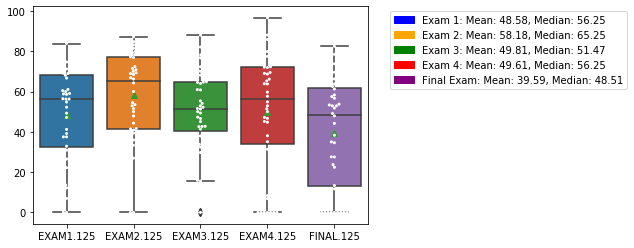

In [8]:
sns.boxplot(data=math123_D.iloc[:,20:25], showmeans = True, order = ['EXAM1.125','EXAM2.125','EXAM3.125','EXAM4.125','FINAL.125'])
sns.swarmplot(data=math123_D.iloc[:,20:25], color = 'white', size = 3
            ,order = ['EXAM1.125','EXAM2.125','EXAM3.125','EXAM4.125','FINAL.125'])
# Creating patches for the legend
blue_patch = mpatches.Patch(color = 'blue', label = 'Exam 1: Mean: %.2f, Median: %.2f' % (mean_E1_D,median_E1_D))
orange_patch = mpatches.Patch(color = 'orange', label = 'Exam 2: Mean: %.2f, Median: %.2f' % (mean_E2_D,median_E2_D))
green_patch = mpatches.Patch(color = 'green', label = 'Exam 3: Mean: %.2f, Median: %.2f' % (mean_E3_D,median_E3_D))
red_patch = mpatches.Patch(color = 'red', label = 'Exam 4: Mean: %.2f, Median: %.2f' % (mean_E4_D,median_E4_D))
purple_patch = mpatches.Patch(color = 'purple', label = 'Final Exam: Mean: %.2f, Median: %.2f' % (mean_FE_D,median_FE_D))

fontP = FontProperties()
fontP.set_size('medium')

plt.legend(handles =[blue_patch, orange_patch, green_patch, red_patch, purple_patch], bbox_to_anchor = (1.05,1), loc = 'upper left', prop = fontP)
plt.show()

Students with a C grade in Math 123 at high risk of a poor outcome in Math 125

In [9]:
math123_C = C1_to_C2[C1_to_C2['GRADE.123'] == 'C']

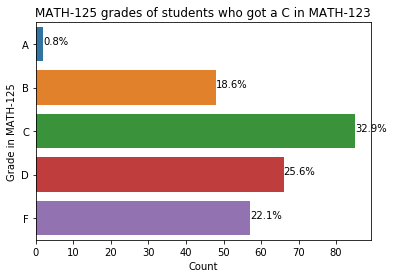

In [10]:
ax = sns.countplot(y = 'GRADE.125', data = math123_C, order=['A','B','C','D','F'])
plt.ylabel('Grade in MATH-125')
plt.xlabel('Count')
plt.title('MATH-125 grades of students who got a C in MATH-123')

total = len(math123_C['GRADE.125'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.show()

In [11]:
math123_A_B = C1_to_C2[(C1_to_C2['GRADE.123'] == 'A') | (C1_to_C2['GRADE.123'] == 'B')]

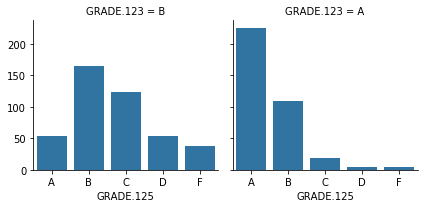

In [55]:
grid = sns.FacetGrid(math123_A_B, col = 'GRADE.123')
grid.map(sns.countplot, 'GRADE.125', order=['A','B','C','D','F'])
plt.show()

In [13]:
C1_to_C2['DIFF'] = C1_to_C2['SCORE.125'] - C1_to_C2['SCORE.123']


In [14]:
C1_to_C2[['SCORE.123','SCORE.125','DIFF']]
print(np.mean(C1_to_C2['DIFF']))
print(np.std(C1_to_C2['DIFF']))

-7.24674796747967
13.632890183449893


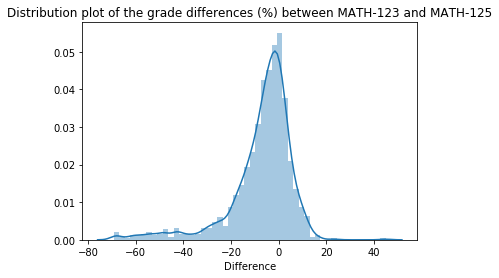

In [15]:
sns.distplot(C1_to_C2['DIFF'])
plt.title('Distribution plot of the grade differences (%) between MATH-123 and MATH-125')
plt.xlabel('Difference')
plt.show()

In [16]:
C1_to_C2.iloc[:,20:25]

,FINAL.125,EXAM1.125,EXAM2.125,EXAM3.125,EXAM4.125
0,58.30,55.41,85.00,102.80,0.00
1,34.83,69.85,18.18,41.89,30.60
2,81.25,46.53,56.94,81.33,89.86
3,97.92,102.08,95.27,77.33,65.94
4,77.92,67.12,66.20,62.33,61.94
...,...,...,...,...,...
1102,58.33,84.29,87.32,85.62,96.48
1103,77.50,55.00,90.30,91.89,79.17
1104,91.67,97.26,68.00,78.77,100.70
1105,93.33,92.36,97.22,93.33,98.65


In [17]:
C1_Exams_mean = []
C1_Exams_std = []
for n in range(6,11):
    C1_Exams_mean.append(C1_to_C2.iloc[:,n].mean())
    C1_Exams_std.append(C1_to_C2.iloc[:,n].std())
    
C2_Exams_means = []
C2_Exams_std = []
for n in range(20,25):
    C2_Exams_means.append(C1_to_C2.iloc[:,n].mean())
    C2_Exams_std.append(C1_to_C2.iloc[:,n].std())

In [18]:
N = 5
ind = np.arange(N)
width = 0.85

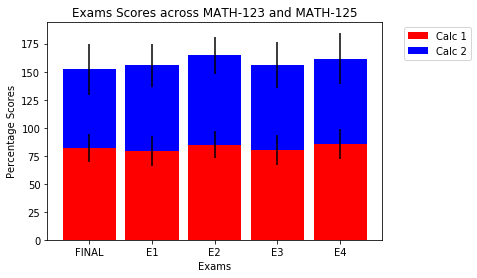

In [19]:
p1 = plt.bar(ind, C1_Exams_mean, width, yerr = C1_Exams_std, color = 'red')
p2 = plt.bar(ind, C2_Exams_means, width, yerr = C2_Exams_std, 
             color = 'blue', bottom = C1_Exams_mean)
plt.xlabel('Exams')
plt.ylabel('Percentage Scores')
plt.title('Exams Scores across MATH-123 and MATH-125')
plt.xticks(ind, ('FINAL', 'E1', 'E2','E3','E4'))
plt.legend((p1[0],p2[0]), ('Calc 1','Calc 2'), bbox_to_anchor = (1.05,1), loc = 'upper left', prop = fontP)
plt.show()

Question 3

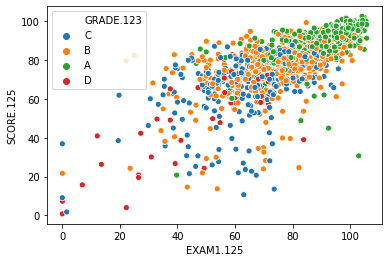

In [60]:
sns.scatterplot(data=C1_to_C2[(C1_to_C2['GRADE.123'] == 'A') | (C1_to_C2['GRADE.123'] == 'B') | (C1_to_C2['GRADE.123'] == 'C') | (C1_to_C2['GRADE.123'] == 'D')], x="EXAM1.125", y="SCORE.125", hue='GRADE.123')

In [61]:
question_3_df= C1_to_C2[(C1_to_C2['GRADE.123'] == 'A') | (C1_to_C2['GRADE.123'] == 'B') | (C1_to_C2['GRADE.123'] == 'C') | (C1_to_C2['GRADE.123'] == 'D') & (C1_to_C2['SCORE.125'] <= C1_to_C2['SCORE.123'])]

In [62]:
question_3_df[question_3_df['SCORE.123'] > question_3_df['SCORE.125']]

,ID.123,GRADE.123,SCORE.123,RAWSCORE.123,HW.123,QUIZ.123,FINAL.123,EXAM1.123,EXAM2.123,EXAM3.123,...,FINAL.125,EXAM1.125,EXAM2.125,EXAM3.125,EXAM4.125,ATT.125,RETAKE.125,RetakeHigh,EventualPass,DIFF
0,10,C,77.39,77.39,90.80,88.94,54.20,88.20,87.90,85.30,...,58.30,55.41,85.00,102.80,0.00,NaN,0,NaN,1,-5.26
1,14,B,82.52,82.39,29.49,77.10,85.41,91.91,86.11,84.55,...,34.83,69.85,18.18,41.89,30.60,25.0,0,NaN,1,-47.65
2,15,A,95.09,91.39,84.36,78.23,98.75,96.32,95.83,70.59,...,81.25,46.53,56.94,81.33,89.86,50.0,0,NaN,1,-16.80
4,22,B,86.85,85.69,93.46,84.05,85.00,84.56,97.30,77.21,...,77.92,67.12,66.20,62.33,61.94,100.0,0,NaN,1,-12.71
5,23,B,83.82,79.06,63.77,55.28,94.58,78.99,95.71,62.86,...,92.50,89.71,67.39,67.36,85.51,0.0,0,NaN,1,-2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,3434,A,97.74,97.67,95.29,98.62,97.50,97.83,97.86,97.01,...,88.33,95.45,95.71,83.58,88.57,NaN,0,NaN,1,-6.23
1097,3436,C,78.70,78.70,95.45,69.50,66.67,70.90,89.86,85.51,...,47.50,50.69,83.78,69.33,61.59,100.0,1,A,1,-15.38
1099,3440,A,93.44,90.12,92.86,85.83,97.50,86.62,87.50,75.37,...,78.33,72.60,74.00,80.14,88.03,100.0,0,NaN,1,-12.25
1100,3442,A,92.37,91.25,92.28,82.36,94.58,91.30,89.29,87.14,...,89.17,82.35,92.75,92.36,81.88,75.0,0,NaN,1,-5.56


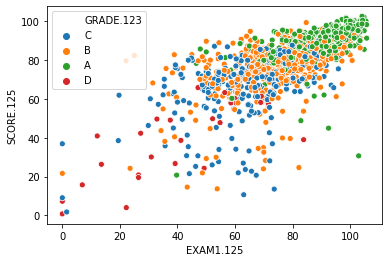

In [63]:
sns.scatterplot(data=question_3_df, x="EXAM1.125", y="SCORE.125", hue='GRADE.123')

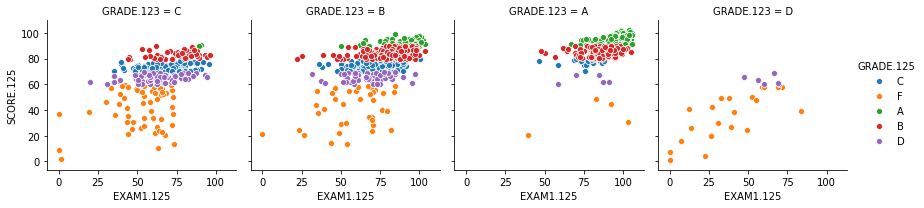

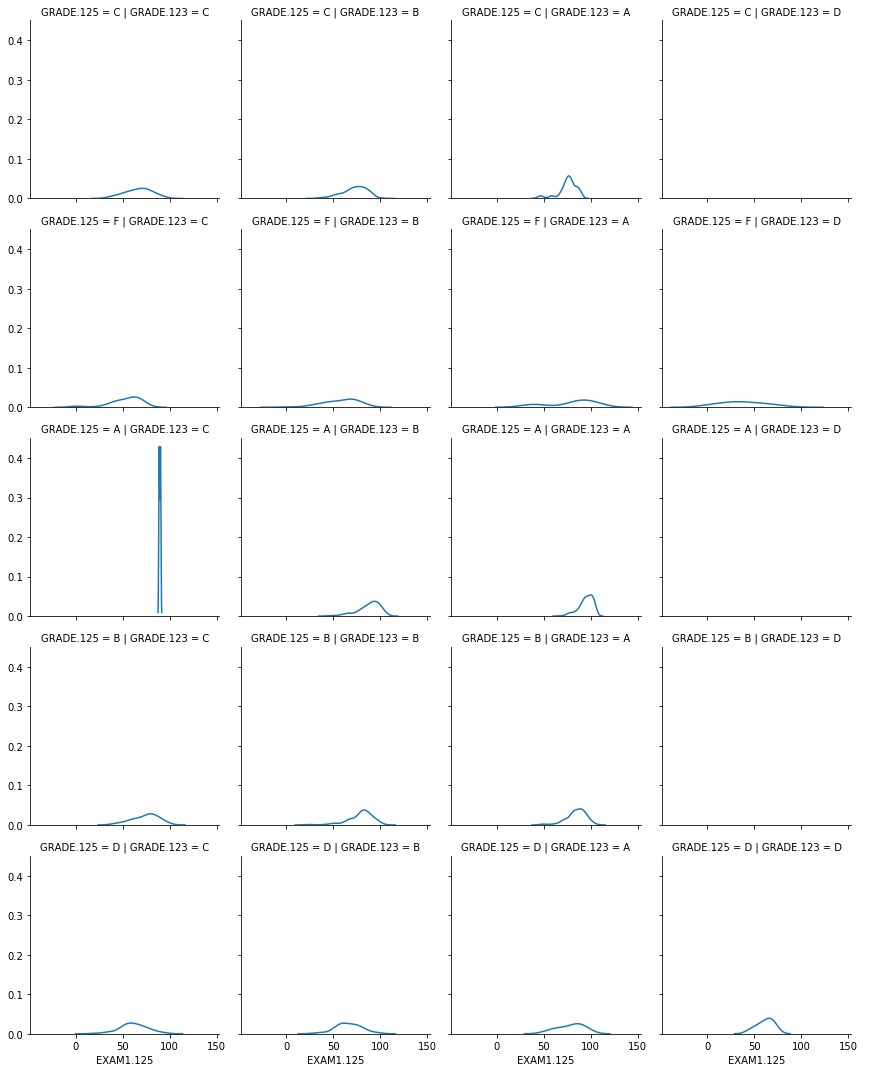

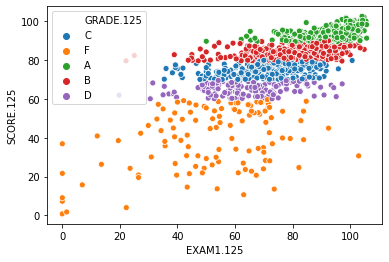

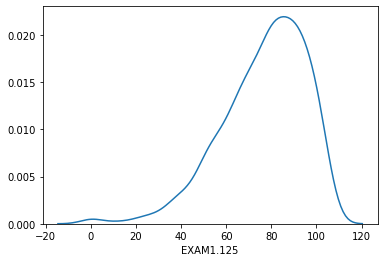

In [100]:
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', hue = 'GRADE.125')
grid.map(sns.scatterplot, 'EXAM1.125', 'SCORE.125')
grid.add_legend()
plt.show()
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', row = 'GRADE.125')
grid.map(sns.distplot, 'EXAM1.125', bins = 2, hist = False)
grid.add_legend()
plt.show()


sns.scatterplot(data=question_3_df, x="EXAM1.125", y="SCORE.125", hue='GRADE.125')
plt.show()
sns.distplot(question_3_df['EXAM1.125'], bins = 10, hist= False)
plt.show()

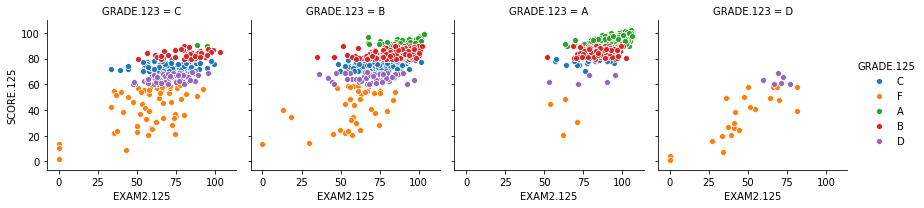

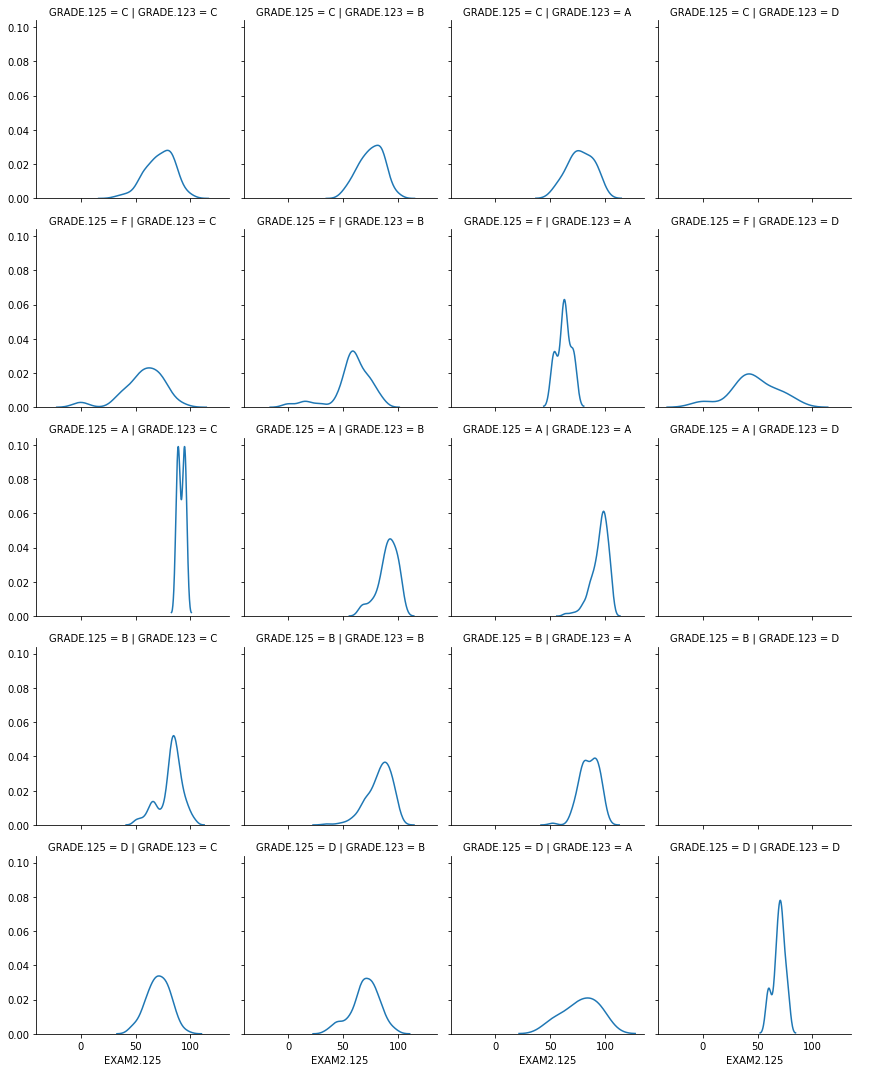

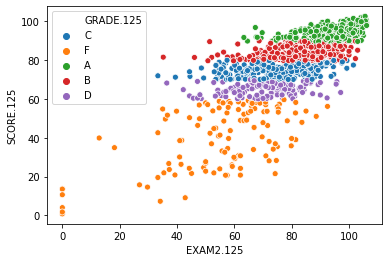

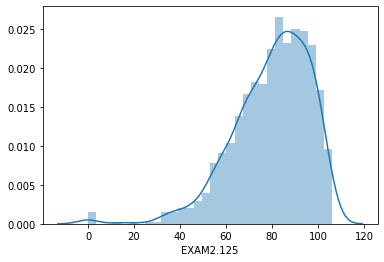

In [102]:
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', hue = 'GRADE.125')
grid.map(sns.scatterplot, 'EXAM2.125', 'SCORE.125')
grid.add_legend()
plt.show()
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', row = 'GRADE.125')
grid.map(sns.distplot, 'EXAM2.125', bins = 2, hist = False)
grid.add_legend()
plt.show()

sns.scatterplot(data=question_3_df, x="EXAM2.125", y="SCORE.125", hue='GRADE.125')
plt.show()
sns.distplot(question_3_df['EXAM2.125'], bins = 30)
plt.show()


- Students w

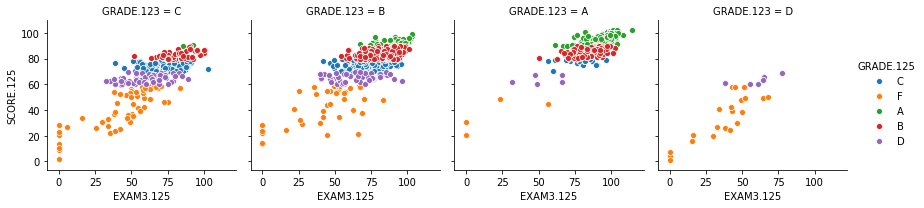

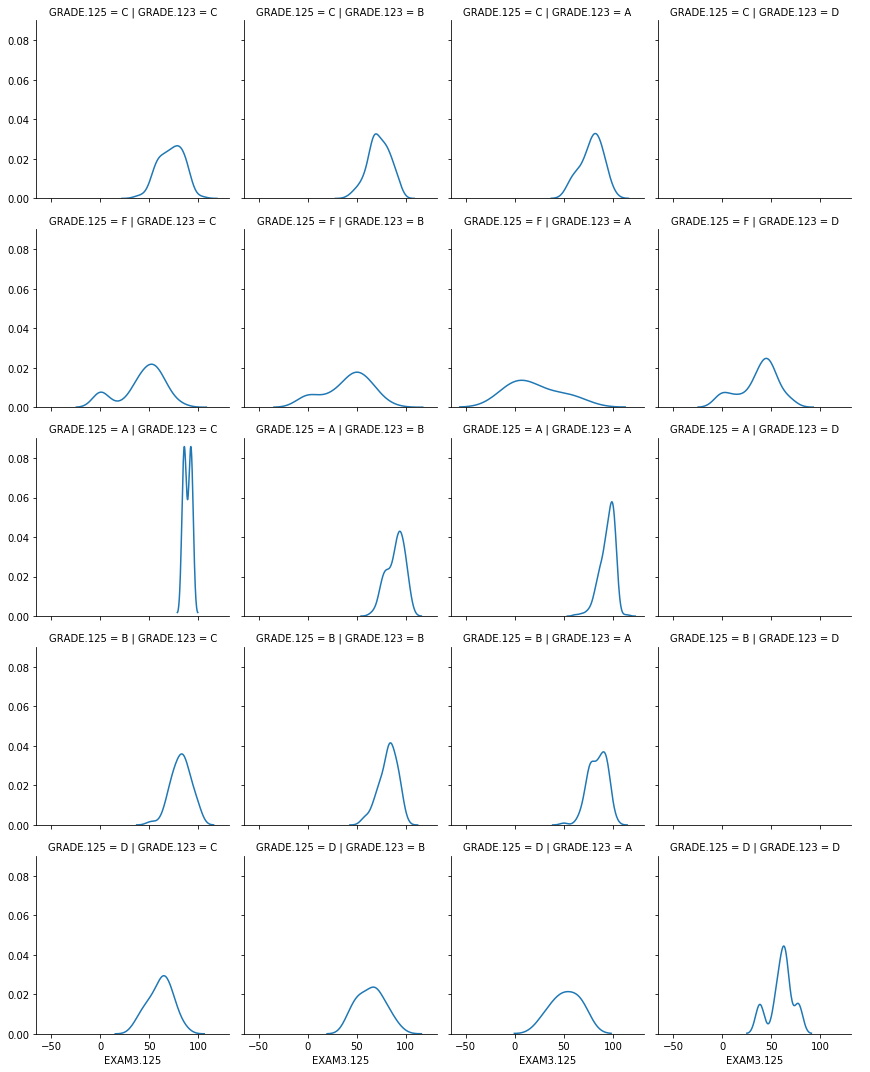

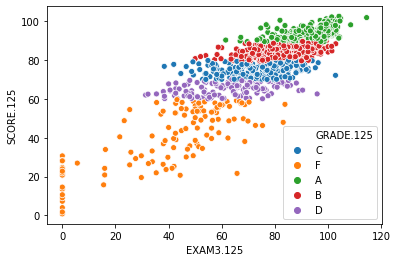

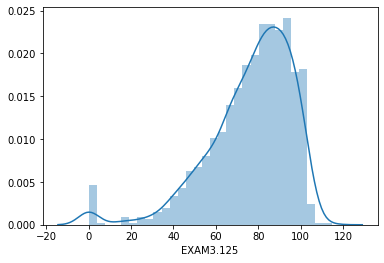

In [104]:
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', hue = 'GRADE.125')
grid.map(sns.scatterplot, 'EXAM3.125', 'SCORE.125')
grid.add_legend()
plt.show()
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', row = 'GRADE.125')
grid.map(sns.distplot, 'EXAM3.125', bins = 2, hist = False)
grid.add_legend()
plt.show()

sns.scatterplot(data=question_3_df, x="EXAM3.125", y="SCORE.125", hue='GRADE.125')
plt.show()
sns.distplot(question_3_df['EXAM3.125'], bins = 30)
plt.show()

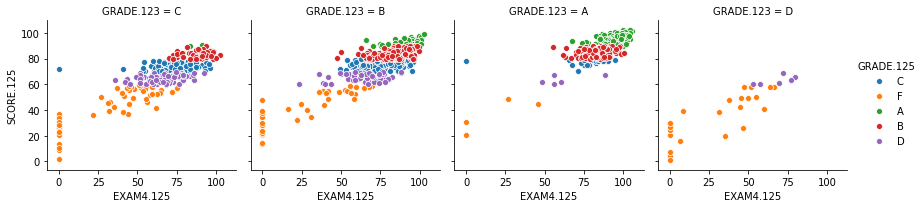

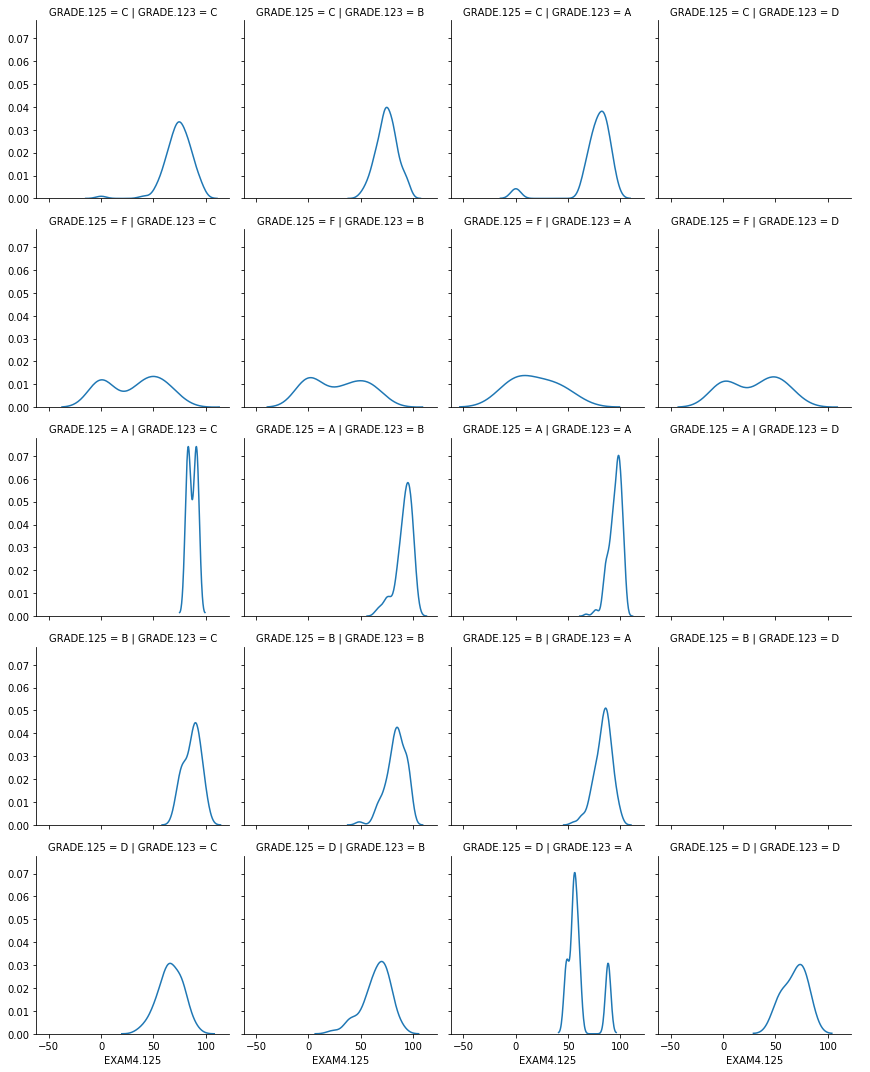

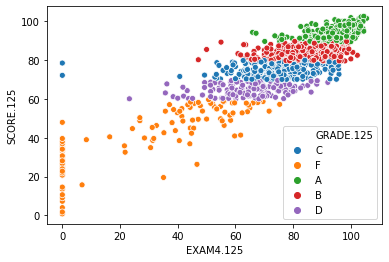

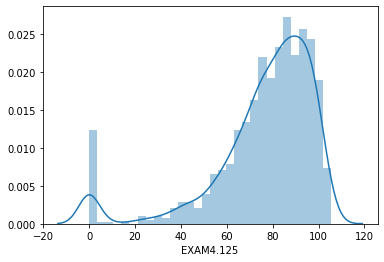

In [105]:
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', hue = 'GRADE.125')
grid.map(sns.scatterplot, 'EXAM4.125', 'SCORE.125')
grid.add_legend()
plt.show()
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', row = 'GRADE.125')
grid.map(sns.distplot, 'EXAM4.125', bins = 2, hist = False)
grid.add_legend()
plt.show()

sns.scatterplot(data=question_3_df, x="EXAM4.125", y="SCORE.125", hue='GRADE.125')
plt.show()
sns.distplot(question_3_df['EXAM4.125'], bins = 30)
plt.show()

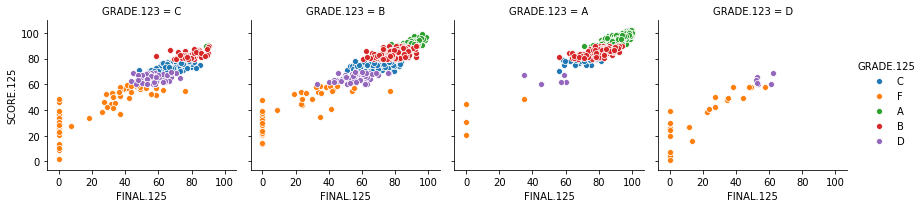

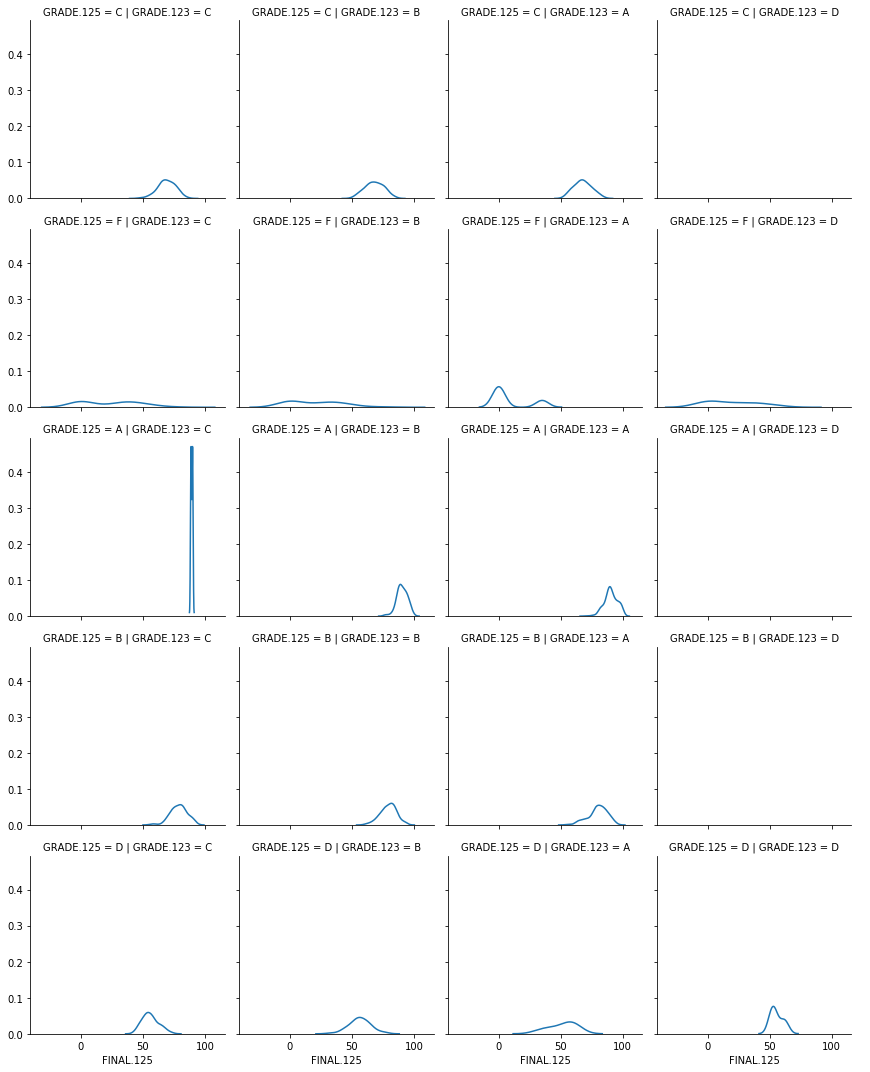

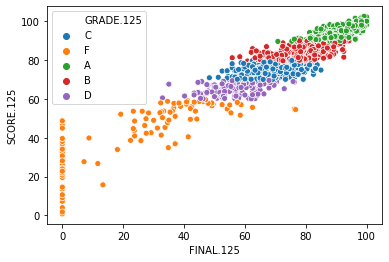

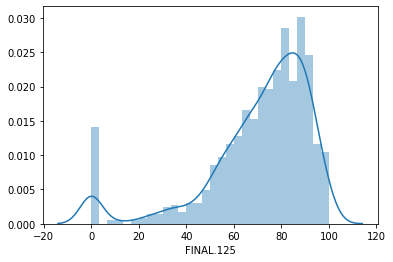

In [106]:
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', hue = 'GRADE.125')
grid.map(sns.scatterplot, 'FINAL.125', 'SCORE.125')
grid.add_legend()
plt.show()
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', row = 'GRADE.125')
grid.map(sns.distplot, 'FINAL.125', bins = 2, hist = False)
grid.add_legend()
plt.show()

sns.scatterplot(data=question_3_df, x="FINAL.125", y="SCORE.125", hue='GRADE.125')
plt.show()
sns.distplot(question_3_df['FINAL.125'], bins = 30)
plt.show()

- Next step I think is to compare all regression charts (A to B,C,D,F; B to C,D,F; etc) to the main data set
- Find the average exam scores and Standard Dev. of the entire population, and compare them to the regression charts' averages and Stadard Deviations

In [107]:
question_3_df

print(question_3_df['EXAM1.125'].mean())

,ID.123,GRADE.123,SCORE.123,RAWSCORE.123,HW.123,QUIZ.123,FINAL.123,EXAM1.123,EXAM2.123,EXAM3.123,...,FINAL.125,EXAM1.125,EXAM2.125,EXAM3.125,EXAM4.125,ATT.125,RETAKE.125,RetakeHigh,EventualPass,DIFF
0,10,C,77.39,77.39,90.80,88.94,54.20,88.20,87.90,85.30,...,58.30,55.41,85.00,102.80,0.00,NaN,0,NaN,1,-5.26
1,14,B,82.52,82.39,29.49,77.10,85.41,91.91,86.11,84.55,...,34.83,69.85,18.18,41.89,30.60,25.0,0,NaN,1,-47.65
2,15,A,95.09,91.39,84.36,78.23,98.75,96.32,95.83,70.59,...,81.25,46.53,56.94,81.33,89.86,50.0,0,NaN,1,-16.80
3,19,B,82.64,78.14,94.75,84.50,73.33,43.28,88.41,93.48,...,97.92,102.08,95.27,77.33,65.94,100.0,0,NaN,1,11.65
4,22,B,86.85,85.69,93.46,84.05,85.00,84.56,97.30,77.21,...,77.92,67.12,66.20,62.33,61.94,100.0,0,NaN,1,-12.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,3444,C,70.84,70.84,96.49,77.88,48.33,65.67,67.81,85.61,...,58.33,84.29,87.32,85.62,96.48,100.0,0,NaN,1,10.87
1103,3445,C,77.74,76.81,65.96,81.20,73.33,67.16,72.79,74.24,...,77.50,55.00,90.30,91.89,79.17,100.0,0,NaN,1,3.53
1104,3452,B,82.01,77.54,98.57,92.88,81.25,59.86,81.94,51.49,...,91.67,97.26,68.00,78.77,100.70,100.0,0,NaN,1,9.71
1105,3453,A,91.49,91.49,91.23,77.34,95.42,78.68,95.14,96.32,...,93.33,92.36,97.22,93.33,98.65,100.0,0,NaN,1,3.52


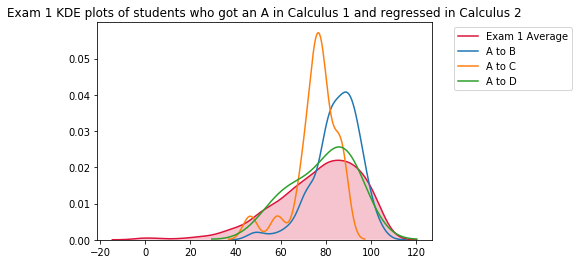

In [144]:
sns.kdeplot(question_3_df['EXAM1.125'], color= 'Crimson', shade = True)
# A to B
sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'B')&(question_3_df['GRADE.123'] == 'A')]['EXAM1.125'])
# A TO C
sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'C')&(question_3_df['GRADE.123'] == 'A')]['EXAM1.125'])
# A TO D
sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'A')]['EXAM1.125'])

plt.legend(('Exam 1 Average','A to B','A to C', 'A to D'), bbox_to_anchor = (1.05,1), loc = 'upper left', prop = fontP)
plt.title('Exam 1 KDE plots of students who got an A in Calculus 1 and regressed in Calculus 2')
plt.show()

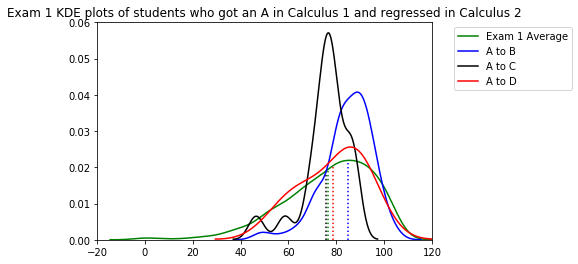

In [192]:
plt.ylim(0, .06)
plt.xlim(-20, 120)

ax = sns.kdeplot(question_3_df['EXAM1.125'], shade=False, color='green')
kdeline = ax.lines[0]
mean3 = question_3_df['EXAM1.125'].mean()
height = np.interp(mean3, kdeline.get_xdata(), kdeline.get_ydata())
ax.vlines(mean3, 0, height, color='green', ls=':')
ax.set_ylim(ymin=0)

# A to B
ax2 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'B')&(question_3_df['GRADE.123'] == 'A')]['EXAM1.125'], color = 'blue', shade = False)
kdeline = ax.lines[0]
mean2 = question_3_df.loc[(question_3_df['GRADE.125'] == 'B')&(question_3_df['GRADE.123'] == 'A')]['EXAM1.125'].mean()
height = np.interp(mean2, kdeline.get_xdata(), kdeline.get_ydata())
ax2.vlines(mean2, 0, height, color='blue', ls=':')
ax2.set_ylim(ymin=0)

# A to C

ax3 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'C')&(question_3_df['GRADE.123'] == 'A')]['EXAM1.125'], color = 'black', shade = False)
kdeline = ax.lines[0]
mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'C')&(question_3_df['GRADE.123'] == 'A')]['EXAM1.125'].mean()
height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
ax3.vlines(mean, 0, height, color='black', ls=':')
ax3.set_ylim(ymin=0)

# A to D
ax3 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'A')]['EXAM1.125'], color = 'red', shade = False)
kdeline = ax.lines[0]
mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'A')]['EXAM1.125'].mean()
height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
ax3.vlines(mean, 0, height, color='red', ls=':')
ax3.set_ylim(ymin=0)


plt.legend(('Exam 1 Average','A to B','A to C', 'A to D'), bbox_to_anchor = (1.05,1), loc = 'upper left', prop = fontP)
plt.title('Exam 1 KDE plots of students who got an A in Calculus 1 and regressed in Calculus 2')
plt.show()
plt.show()

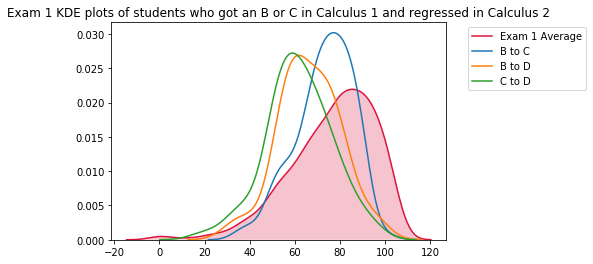

In [147]:
sns.kdeplot(question_3_df['EXAM1.125'], color= 'Crimson', shade = True)
# B to C
sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'C')&(question_3_df['GRADE.123'] == 'B')]['EXAM1.125'])
# B TO D
sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'B')]['EXAM1.125'])
# C to D
sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'C')]['EXAM1.125'])

plt.legend(('Exam 1 Average','B to C','B to D', 'C to D'), bbox_to_anchor = (1.05,1), loc = 'upper left', prop = fontP)
plt.title('Exam 1 KDE plots of students who got an B or C in Calculus 1 and regressed in Calculus 2')
plt.show()

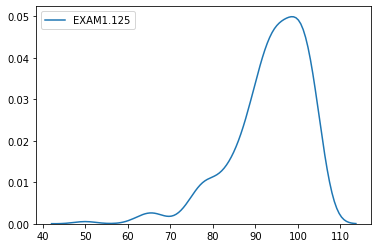

In [125]:
sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'A')]['EXAM1.125'])